<a href="https://colab.research.google.com/github/ilEnzio/DS-Unit-2-Kaggle-Challenge/blob/master/Unit_2_Sprint_2_Tree_Ensembles_Study_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This study guide should reinforce and provide practice for all of the concepts you have seen in the past week. There are a mix of written questions and coding exercises, both are equally important to prepare you for the sprint challenge as well as to be able to speak on these topics comfortably in interviews and on the job.

If you get stuck or are unsure of something remember the 20 minute rule. If that doesn't help, then research a solution with google and stackoverflow. Only once you have exausted these methods should you turn to your Team Lead - they won't be there on your SC or during an interview. That being said, don't hesitate to ask for help if you truly are stuck.

Have fun studying!

# Resources

[Category Encoders](https://contrib.scikit-learn.org/categorical-encoding/)

[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[Hyperparameter Tuning](https://scikit-learn.org/stable/modules/grid_search.html)

[Confusion Matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

[Scoring Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [1]:
import pandas as pd
import sys

!pip install category_encoders==2.*

     |████████████████████████████████| 81kB 2.2MB/s 


Use the dataframe below for all questions unless otherwise stated

In [2]:
# https://www.kaggle.com/ronitf/heart-disease-uci
df = pd.read_csv('https://raw.githubusercontent.com/bundickm/Study-Guides/master/data/hearts.csv')
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,Male,D,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,Male,C,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,Female,B,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,Male,B,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,Female,A,120,354,0,1,163,1,0.6,2,0,2,1


# Basics and Data Preparation

Define the following terms in your own words, do not simply copy and paste a definition found elsewhere but reword it to be understandable and memorable to you. *Double click the markdown to add your definitions.*
<br/><br/>

**Logistic Regression:** prediction model that is used on classification problems.

**Imbalanced Classes:** disproportionate ratio of observations in each class; deal with it through stratification, or resampling.

**Leakage:** the use of information in the model training process which would not be expected to be available at prediction time, causing the predictive scores (metrics) to overestimate the model's utility when run in a production environment

**Categorical Encoding:**  change a features values from one category to another, usually going from category to numeric.

**Skew:** the degree of distortion from a normal distribution.

**Log Transformation:** `Your Answer Here`

**Outliers:** an extreme value; a data value that is very different from most of the data;

Answer the following questions in plain english as much as possible.
<br/><br/>

What are some ways to deal with imbalanced classes?
```
I could deal with it through stratification, or directly resampling
```

What are some possible sources of data leakage?
```
if you leave your target vector in the trainset this would cause data leakage. Or if you have time dependent data and your training set contains dates from the future this might cause data leakage.
```

What are some indicators or methods for detecting data leakage?
```
if your training accuracy is very much higher than your validation accuracy that might indicate that you have some data leakage.
```

What is the relationship between skew and log transformation?
```
a log transform or any scaler transformation will adjust the distribution towards a normal distribution. 
```

Using the dataset above, complete the following:
- Train/Test/Validation Split
- Get a baseline
- Perform EDA with visuals
- Clean up any nulls, duplicate columns, or outliers you might find
- Engineer at least 2 features
- Use One Hot or Ordinal Encoding on one feature

## Import Libraries and Modules


In [3]:


import matplotlib.pyplot as plt
import numpy as np
from pandas_profiling import ProfileReport
import pandas as pd

from pandas.plotting import scatter_matrix
import seaborn as sns

# special sauce for custom method :) 
from collections import namedtuple

from sklearn.model_selection import train_test_split



# ML models
from sklearn.linear_model import LinearRegression # old reliable model, for continous
from sklearn.linear_model import Ridge # RidgeRegression to guard against overfit
from sklearn.linear_model import LogisticRegression # used to predict categorical vectors
from sklearn.tree import DecisionTreeClassifier # decision Tree for classification problems

from sklearn.ensemble import RandomForestClassifier # group of trees to guard against variance

from sklearn.model_selection import GridSearchCV

# Metric accessing functions
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Transformers
import category_encoders as ce
from category_encoders import OneHotEncoder # splits cat variable 
from category_encoders import OrdinalEncoder # encode cats into ordered numbers


from sklearn.feature_selection import SelectKBest # selects highest correlating features
from sklearn.impute import SimpleImputer

# Lets us combine the steps for cleaner code
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Wrangle and EDA


1.   Drop unnamed column
2.   OHE - sex, cp
3.   



## Feature Engineering
#### I might move this to the wrangle function

* create age range category


In [4]:
#29-35, 36-40, 41-45,46-50,51-55, 56-60, 65-70, 71-75, 76-80

In [5]:
# age_cut_labels_9 = ["29-35", "36-40", "41-45","46-50","51-55", "56-60",
#                     "61-65","66-70", "71-75", "76-80"]
# cut_bins = [0, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]

# heartd_df["age_range"] = pd.cut(heartd_df["age"], bins=cut_bins,
#                                 labels= age_cut_labels_9)

###Wrangle Function

In [6]:
def wrangle_heart_df(df):
  

  #create age range category
  age_cut_labels_9 = ["29-35", "36-40", "41-45","46-50","51-55", "56-60",
                    "61-65","66-70", "71-75", "76-80"]
  cut_bins = [0, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]

  df["age_range"] = pd.cut(df["age"], bins=cut_bins,
                                labels= age_cut_labels_9)


  #drop the useless column
  df = df.drop(['Unnamed: 0', "age", "fbs"], axis=1)
  
  # encode the string columns
  ohe = OneHotEncoder(use_cat_names=True)
  df = ohe.fit_transform(df)
  
  return df

In [7]:
# Make a function to create Matrix and Target pre validation split
def create_Xmatrix_ytarget(training_df):
  y_target = training_df['target']
  X_matrix = training_df.drop('target', axis=1)
  return (X_matrix, y_target)

In [8]:
heartd_df = df.copy()

In [9]:
heartd_df.columns

Index(['Unnamed: 0', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
heartd_df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,Male,D,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,Male,C,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,Female,B,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,Male,B,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,Female,A,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
heartd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    object 
 3   cp          303 non-null    object 
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


In [12]:
heartd_df.shape

(303, 15)

In [13]:
# plt.figure(figsize=(8,8))
# sns.scatterplot(x=heartd_df['age'], y=heartd_df['thalach'],hue=heartd_df['target'])
# plt.xlabel('age')
# plt.ylabel('thalach')

In [14]:
heartd_df = wrangle_heart_df(heartd_df)
heartd_df.shape

(303, 26)

In [15]:
heartd_df.head()

,sex_Male,sex_Female,cp_D,cp_C,cp_B,cp_A,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_range_29-35,age_range_36-40,age_range_41-45,age_range_46-50,age_range_51-55,age_range_56-60,age_range_61-65,age_range_66-70,age_range_71-75,age_range_76-80
0,1,0,1,0,0,0,145,233,0,150,0,2.3,0,0,1,1,0,0,0,0,0,0,1,0,0,0
1,1,0,0,1,0,0,130,250,1,187,0,3.5,0,0,2,1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,130,204,0,172,0,1.4,2,0,2,1,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,1,0,120,236,1,178,0,0.8,2,0,2,1,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,1,120,354,1,163,1,0.6,2,0,2,1,0,0,0,0,0,1,0,0,0,0


In [16]:
corr_matrix= heartd_df.corr()

In [17]:
corr_matrix["target"].sort_values(ascending=False)

target             1.000000
thalach            0.421741
slope              0.345877
cp_C               0.316742
sex_Female         0.280937
cp_B               0.245879
age_range_41-45    0.195582
restecg            0.137230
age_range_71-75    0.105777
age_range_51-55    0.101072
cp_D               0.086957
age_range_29-35    0.052411
age_range_36-40    0.049793
age_range_46-50    0.024465
age_range_76-80   -0.007293
age_range_66-70   -0.062873
chol              -0.085239
age_range_61-65   -0.130189
trestbps          -0.144931
age_range_56-60   -0.190077
sex_Male          -0.280937
thal              -0.344029
ca                -0.391724
oldpeak           -0.430696
exang             -0.436757
cp_A              -0.516015
Name: target, dtype: float64

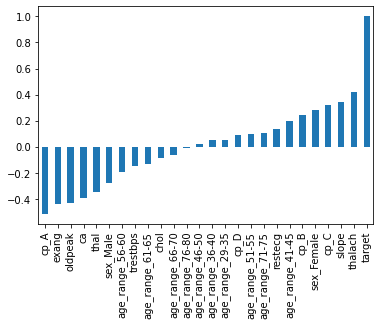

In [18]:
%matplotlib inline
corr_matrix.target.sort_values().plot.bar()


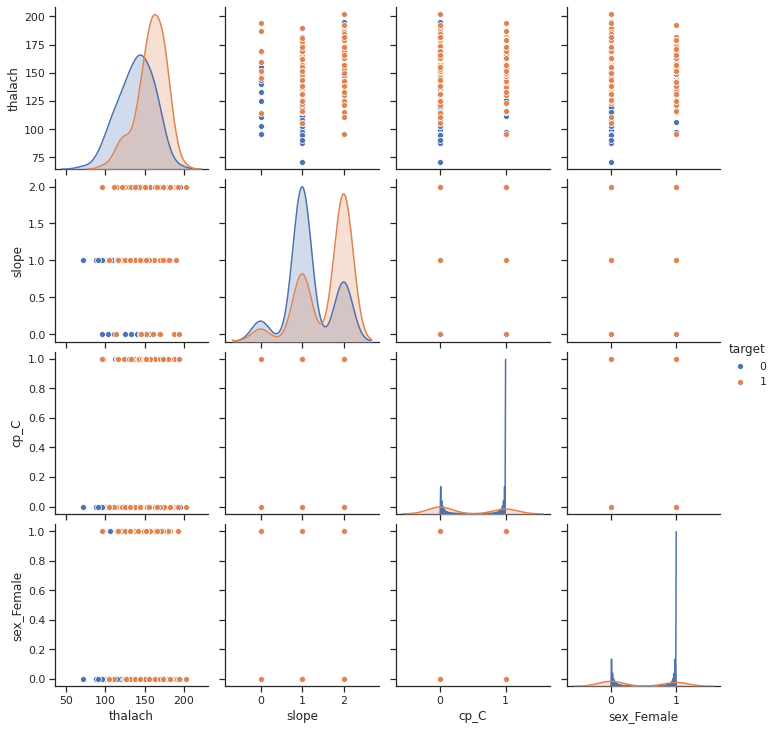

In [19]:
sns.set(style="ticks")

attributes = ["target", "thalach", "slope", "cp_C", "sex_Female"]

sns.pairplot(heartd_df[attributes], hue="target")



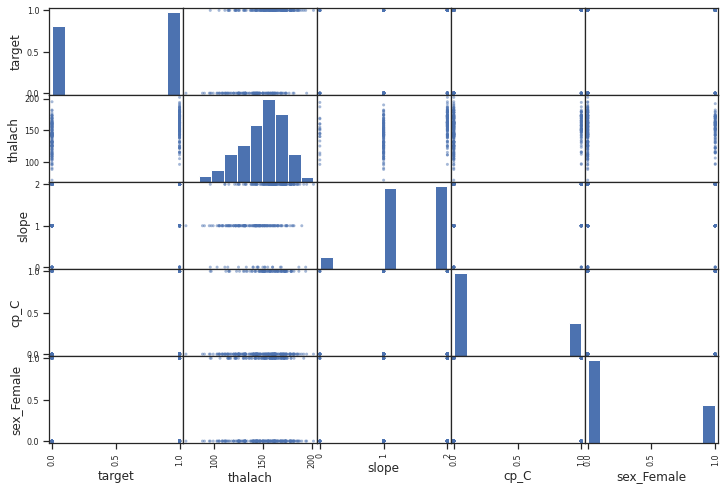

In [20]:
scatter_matrix(heartd_df[attributes], figsize=(12,8))
plt.show()

In [21]:
heartd_df.head(2)

,sex_Male,sex_Female,cp_D,cp_C,cp_B,cp_A,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_range_29-35,age_range_36-40,age_range_41-45,age_range_46-50,age_range_51-55,age_range_56-60,age_range_61-65,age_range_66-70,age_range_71-75,age_range_76-80
0,1,0,1,0,0,0,145,233,0,150,0,2.3,0,0,1,1,0,0,0,0,0,0,1,0,0,0
1,1,0,0,1,0,0,130,250,1,187,0,3.5,0,0,2,1,0,1,0,0,0,0,0,0,0,0


### Get a Baseline Metric 
## For Classification will take the Majority Classifier (Accuracy)


In [22]:
heartd_df['target'].value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

### Create X_Matrix(Feature) and y_target 


In [23]:
X_matrix, y_target = create_Xmatrix_ytarget(heartd_df)

In [24]:
print(X_matrix.shape)
print(y_target.shape)

(303, 25)
(303,)


### Train Val Test split

In [25]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(
    X_matrix, y_target, train_size=0.80, test_size=0.20, random_state=42)

In [26]:
print(X_train_temp.shape)
print(y_train_temp.shape)
print(X_test.shape)
print(y_test.shape)

(242, 25)
(242,)
(61, 25)
(61,)


In [27]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_temp, y_train_temp, train_size=0.80, test_size=0.20, random_state=42)

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(193, 25)
(193,)
(49, 25)
(49,)
(61, 25)
(61,)


In [29]:
X_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex_Male         303 non-null    int64  
 1   sex_Female       303 non-null    int64  
 2   cp_D             303 non-null    int64  
 3   cp_C             303 non-null    int64  
 4   cp_B             303 non-null    int64  
 5   cp_A             303 non-null    int64  
 6   trestbps         303 non-null    int64  
 7   chol             303 non-null    int64  
 8   restecg          303 non-null    int64  
 9   thalach          303 non-null    int64  
 10  exang            303 non-null    int64  
 11  oldpeak          303 non-null    float64
 12  slope            303 non-null    int64  
 13  ca               303 non-null    int64  
 14  thal             303 non-null    int64  
 15  age_range_29-35  303 non-null    int64  
 16  age_range_36-40  303 non-null    int64  
 17  age_range_41-45 

# Model Building

Define the following terms in your own words, do not simply copy and paste a definition found elsewhere but reword it to be understandable and memorable to you. *Double click the markdown to add your definitions.*
<br/><br/>

**Decision Tree:** predictive model capable of finding complex nonlinear relationship in data

**Ensemble Methods (Ensemble Models):** `a group of model that may perform better than an individual model, because the models in the ensemble make different errors`

**Gradient Descent:** `an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model.`

**Bagging:** `a model averaging approach.  the goal is to reduce `

**Boosting:** `Your Answer Here`

**Hyperparameters:** `Parameters that are not provided by the data. They are provided by the engineer.  In my opinion they are simulating domain knowledge`

Build a random forest classifier using the dataset you cleaned and prepped above.

In [30]:
ran_forest_01 = make_pipeline(
    OneHotEncoder(),
    RandomForestClassifier(max_depth=3,
                           min_samples_split=12)
    )

In [31]:
ran_forest_01.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=[], drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               return_df=True, use_cat_names=False,
                               verbose=0)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=3, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1,
                                        min_samples_split=12,
                                        min_weight_fraction_leaf=0.0,
                       

In [32]:
print(f"Training Accuracy: {ran_forest_01.score(X_train, y_train)}")
print(f"Validation Accuracy: {ran_forest_01.score(X_val, y_val)}")

Training Accuracy: 0.8860103626943006
Validation Accuracy: 0.7755102040816326


In [33]:
y_pred_ran_f_model = ran_forest_01.predict(X_val)

Graph your model's feature importances

In [34]:
classifier = ran_forest_01.named_steps['randomforestclassifier']
feature_names = ran_forest_01.named_steps['onehotencoder'].feature_names

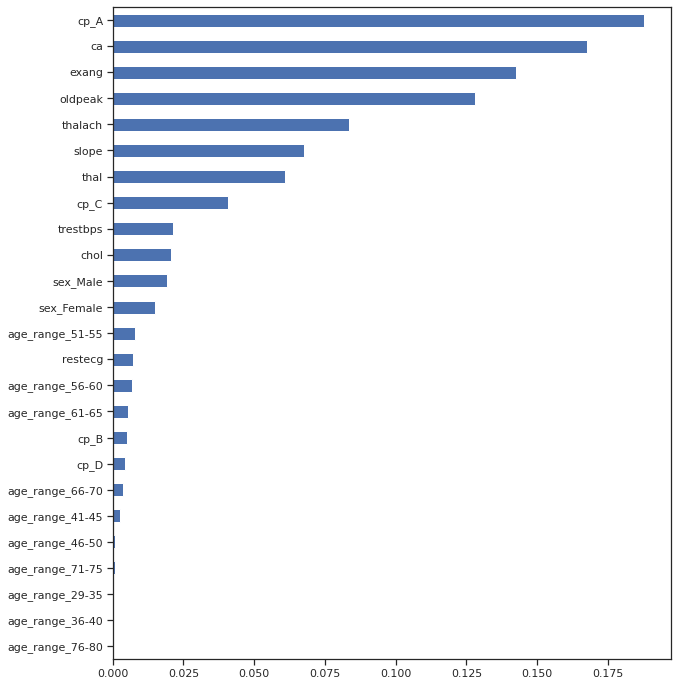

In [35]:
import matplotlib.pyplot as plt

feat_importances = classifier.feature_importances_
importances = pd.Series(feat_importances, index=feature_names)

plt.figure(figsize=(10,12))
importances.sort_values().plot(kind='barh');

In 2-3 sentences, explain how to interpret and use the feature importances to further refine or help explain your model.

```
The features that are at the top are the ones which the model finds most important in predicting the target. I would start by eliminating the features which aren't as importance.  
```

How does feature importance differ from drop-column importances and permutation importances?

```
Drop column importance is the effect that a column has if we drop it.  But permutation importance is a measure of a column after it has passed through a random forest vs not permuting. ```

Build a logisitic regression model using the dataset you cleaned and prepped above.

In [36]:
log_reg_model = make_pipeline(
      StandardScaler(),
      LogisticRegression())

log_reg_model.fit(X_train, y_train)

y_pred_log = log_reg_model.predict(X_train)

Plot the coefficients of your model.

In [37]:
test_model = log_reg_model.named_steps["logisticregression"]

In [38]:
test_model.coef_[0]

array([-0.38951935,  0.38951935,  0.28049045,  0.45030928,  0.00955816,
       -0.55791396, -0.30109018, -0.29920895,  0.36162086,  0.67922608,
       -0.56518723, -0.45993107,  0.39126561, -0.96525589, -0.61906196,
       -0.0689582 ,  0.10853816, -0.07148101, -0.28532274,  0.40649107,
       -0.17913406, -0.20333418,  0.23386695,  0.34347815,  0.00392611])

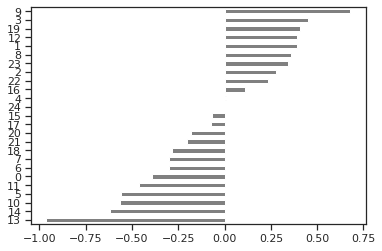

In [39]:
model = log_reg_model.named_steps['logisticregression']
scaler = log_reg_model.named_steps['standardscaler']
scaled_columns = pd.DataFrame(scaler.transform(X_val.loc[:,:])).columns
coefficients = pd.Series(model.coef_[0], scaled_columns)
coefficients.sort_values().plot.barh(color='grey');

In 2-3 sentences, explain how to interpret and use the coefficients to further refine or help explain your model.

```
Your Answer Here
```

What is an example of an ensemble method?

```
Your Answer Here
```

What do we mean by hyperparameter tuning and how can we automate the tuning process?

```
Your Answer Here
```

# Metrics and Model Evaluation

Define the following terms in your own words, do not simply copy and paste a definition found elsewhere but reword it to be understandable and memorable to you. *Double click the markdown to add your definitions.*
<br/><br/>

**ROC:** `Receiver Operating Characteristic (ROC) Curve `

**ROC-AUC:** `Your Answer Here`

**Discrimination Threshold:** `Your Answer Here`

**Precision:** `metric;The proportion of positive identifications that were actually correct; raising precision, raises the false negatives. "How useful the results are"`

**Recall:** `The proportion of actual positives that were correctly identified. "How complete the results are"; larger recall raises false positives;`

**F1 Score:** `The harmonic average of the precision and recall; an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.`

**Confusion Matrix:** `Error Matrix; A table layout that allows visualization of the performance of an algorithm. Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa).`

Choose one of your models above to complete the following:
- Get your model's validation accuracy (This may be done multiple times if you are refining your model)
- Get your model's test accuracy
- Create a confusion matrix for your model
- Calculate the Accuracy, F1 Score, Precision, and Recall by hand
- Use SKLearn to calculate accuracy, F1 score, precision, and recall to confirm your work.

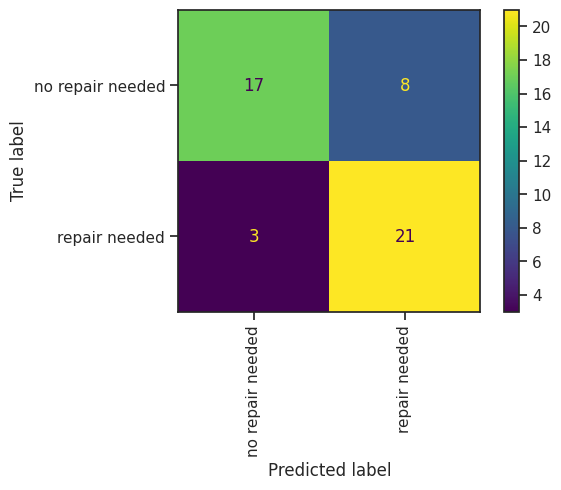

In [51]:
from sklearn.metrics import plot_confusion_matrix, classification_report

plt.rcParams['figure.dpi'] = 100

plot_confusion_matrix(ran_forest_01, X_val, y_val, values_format='.0f',
                      display_labels=['no repair needed', 'repair needed'],
                      xticks_rotation='vertical');

In [53]:
print(classification_report(y_val, ran_forest_01.predict(X_val)))

              precision    recall  f1-score   support

           0       0.85      0.68      0.76        25
           1       0.72      0.88      0.79        24

    accuracy                           0.78        49
   macro avg       0.79      0.78      0.77        49
weighted avg       0.79      0.78      0.77        49



𝐴𝑐𝑐𝑢𝑟𝑎𝑐𝑦=(True Positives + True Negatives)/Total Number of Predictions

In [47]:
# for the positive class only 
total_pred = 17 +8 +3 +21
total_pred

49

In [48]:
correct_pred = 17+21
correct_pred

38

In [49]:
correct_pred/total_pred

0.7755102040816326

In [50]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_val, y_pred_ran_f_model)

0.7551020408163265

𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛=True Positives/(True Positives + False Positives)

In [61]:
prec= 21/(21+8)
prec

0.7241379310344828

𝑅𝑒𝑐𝑎𝑙𝑙=True Positives/(True Positives + False Negatives)

In [62]:
recall = 21/(21+3)
recall

0.875

𝐹1=2((Precision⋅Recall)/(Precision + Recall))

In [63]:
f1 = 2*((prec*recall)/(prec+recall))
f1 

0.7924528301886793

Give an example of when we would use precision to score our model and explain why precision is the best metric for that situation.

```
Your Answer Here
```

Give an example of when we would use recall to score our model and explain why recall is the best metric for that situation.

```
Your Answer Here
```

Find your model's ROC-AUC Score

Plot your model's ROC Curve